## Importing Libraries

In [1]:
# Importing Data Analysis Libraries
import numpy as np
import pandas as pd

# Importing Data Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For ploting within Jupyter
%matplotlib inline

## Reading Data

In [2]:
#Reading our data
df = pd.read_csv("loan_data.csv")

#Checking the head of our data
df.head()

In [4]:
#Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
#Checking basic metrics
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Data Analysis Exploration

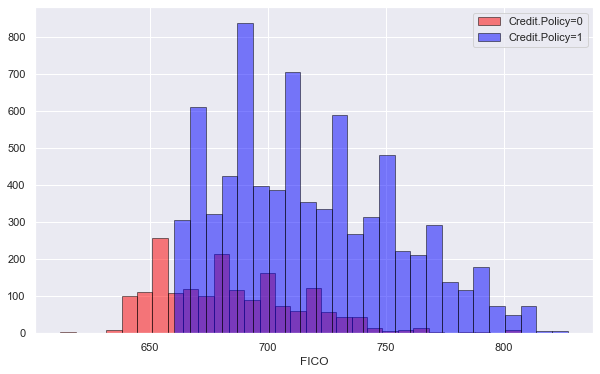

In [116]:
#Creating a histogram of fico having credit policy as hue 
plt.figure(figsize=(10,6))
plt.grid()

df[df['credit.policy']==0]['fico'].hist(bins=30, color = 'red', alpha = 0.5, label='Credit.Policy=0', ec='black')
df[df['credit.policy']==1]['fico'].hist(bins=30, color = 'blue', alpha = 0.5, label='Credit.Policy=1', ec='black')

plt.legend()
plt.xlabel('FICO')

plt.show()

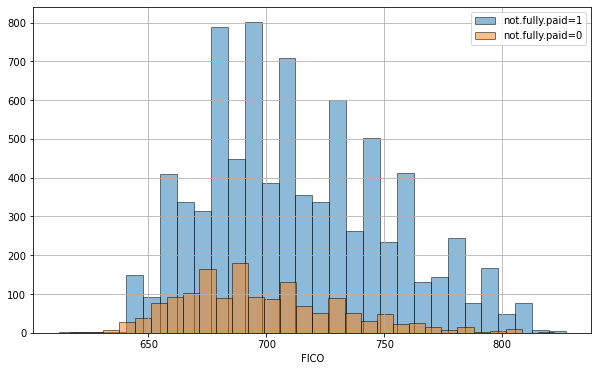

In [59]:
#Creating a histogram of fico having not fuly paid as hue 
plt.figure(figsize=(10,6))

df[df['not.fully.paid']==0]['fico'].hist(bins=30, ec='black', label='not.fully.paid=1', alpha = 0.5)
df[df['not.fully.paid']==1]['fico'].hist(bins=30, ec='black', label='not.fully.paid=0', alpha = 0.5)

plt.xlabel('FICO')
plt.legend()

plt.show()

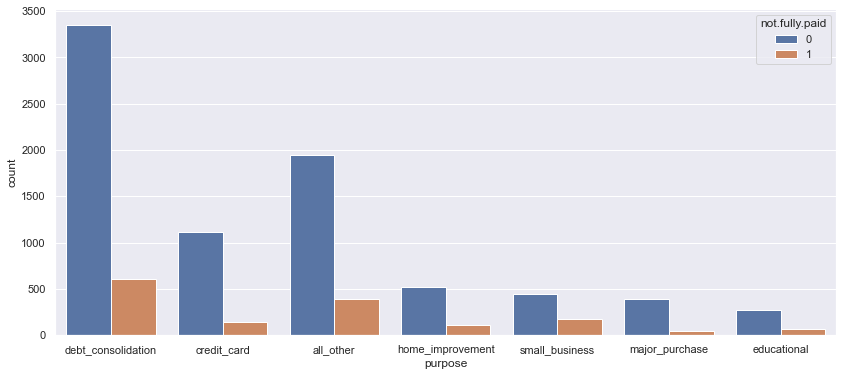

In [64]:
# Creating a countplot based on purpose of loan while having not fully paid as hue
sns.set_theme(style="darkgrid")
plt.figure(figsize=(14,6))
sns.countplot(x=df['purpose'], hue=df['not.fully.paid'])
plt.show()

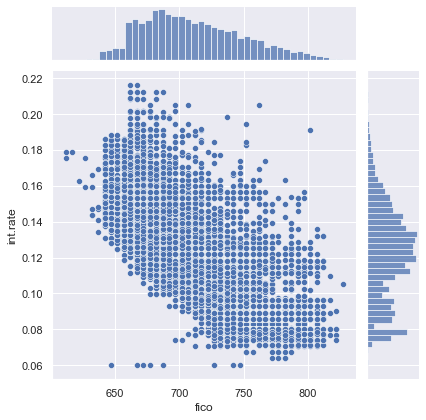

In [118]:
#Creating a joinplot combining the FICO score and interest rate
sns.jointplot(x=df['fico'], y=df['int.rate'])

<Figure size 720x432 with 0 Axes>

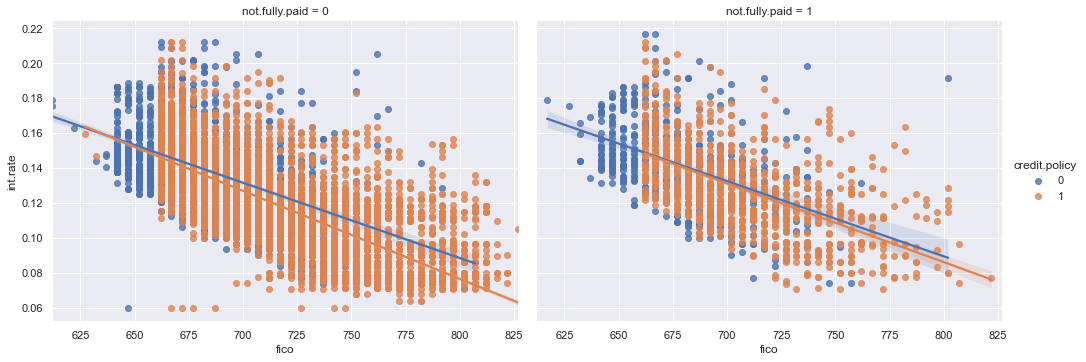

In [80]:
#Creating lmplots to see coorelation between FICO and interest rate
#Having seperate plots for not fully paid with credit policy as hue
plt.figure(figsize=(10,6))
sns.lmplot(x='fico', y='int.rate', data=df, hue='credit.policy', col='not.fully.paid', aspect=1.4)

## Standardizing our data

In [81]:
#Checking the type of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [85]:
#Converting the categorical feature 
cat_feats = ['purpose']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data

## Splitting Data

In [119]:
# Importing library for split & splitting data
from sklearn.model_selection import train_test_split

X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training the Decision Tree Model

In [92]:
# Importing Decision Tree library
from sklearn.tree import DecisionTreeClassifier

# Creating instance and training the model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

## Predicting Data for Decision Tree

In [97]:
# Getting our predictions
dtree_pred = dtree.predict(X_test)

## Evaluating Decision Tree

In [98]:
# Importing evaluation libraries
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
# Printing classification report
print(classification_report(y_true=y_test, y_pred=dtree_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2390
           1       0.22      0.23      0.23       484

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.73      0.74      2874



In [100]:
# Printing confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=dtree_pred))

[[1995  395]
 [ 372  112]]


## Training the Random Forest Model

In [101]:
# Importing Random Forest library
from sklearn.ensemble import RandomForestClassifier

# Creating instance and training the model with n_estimators = 200
# We can play around with n to have different results
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

## Predicting Data for Decision Tree

In [112]:
# Getting our predictions
rfc_pred = rfc.predict(X_test)

## Evaluating Random Forest

In [113]:
# Importing evaluation libraries
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
# Printing classification report
print(classification_report(y_true=y_test, y_pred=rfc_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2390
           1       0.36      0.01      0.02       484

    accuracy                           0.83      2874
   macro avg       0.60      0.50      0.46      2874
weighted avg       0.75      0.83      0.76      2874



In [115]:
# Printing confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=rfc_pred))

[[2383    7]
 [ 480    4]]
